In [14]:
from __future__ import print_function

import math
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import scipy.stats as sci


# Section 2

In [19]:
# Reading data frame from database.
df = pd.read_csv('basketball_players.csv', sep=',')
# Finding mean in order to replace with null values.
mean = df.points.mean()
df['points'] = df['points'].fillna(mean)
# Filtering points and rebounds column.
filteredDf = df[['points', 'oRebounds']]
# Removing zero value rows from filtered data frame.
filteredDf = filteredDf[~(filteredDf == 0).any(axis=1)]

In [20]:
points = filteredDf.points
oRebounds = filteredDf.oRebounds

# Section 3

In [21]:
# Mean of points.
pMean = points.mean()
# Variance of points.
pVariance = points.var()
# Standard derivation of points.
pStd = points.std()
# Median of points.
pMedian = points.median()
# Mode of points.
pMod = points.mode()

pMean, pVariance, pStd, pMedian, pMod

(542.6871395445627, 253870.62395815694, 503.85575709537835, 396.0, 0    2
 dtype: int64)

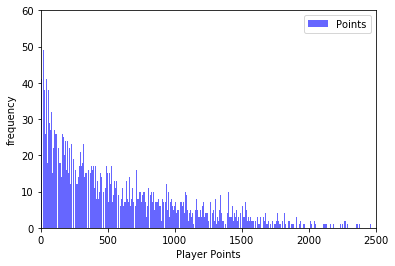

In [22]:
# Histogram of basketball players points.
pHist = thinkstats2.Hist(points, label='Points')

thinkplot.Hist(pHist, color='blue')
thinkplot.Config(xlabel='Player Points', ylabel='frequency', axis=[0,2500,0,60])

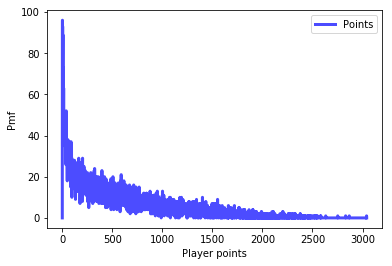

In [23]:
# PMF of basketball players points.
pPmf = thinkstats2.Hist(points)

thinkplot.Pmf(pPmf, color='blue', label='Points')
thinkplot.Config(xlabel='Player points', ylabel='Pmf')

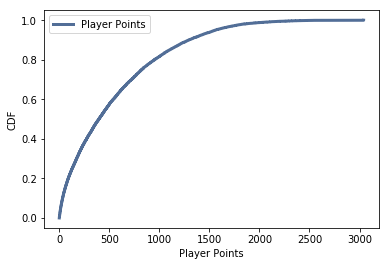

In [24]:
# CDF of black and white mans heights.
pCdf = thinkstats2.Cdf(points, label='Player Points')

thinkplot.Cdf(pCdf)
thinkplot.Config(xlabel='Player Points', ylabel='CDF', loc='upper left')

# Section 4

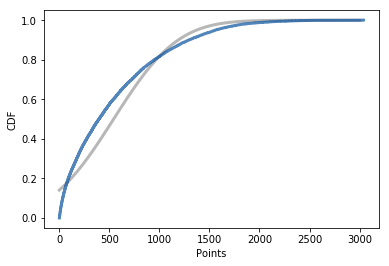

In [64]:
# Plot the model
# Creating cdf in range 0 and 3000 by using mean of points and standard derivation of points 
xs, ps = thinkstats2.RenderNormalCdf(pMean, pStd, low=0, high=3000)
thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(points, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='Points',
                 ylabel='CDF')

# Section 5

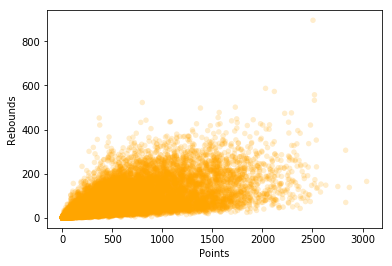

In [27]:
# Plotting scatter for points and pffensive rebounds columns.
thinkplot.Scatter(points, oRebounds, alpha=0.2, color='Orange')
thinkplot.Config(xlabel='Points',
                 ylabel='Rebounds', legend=False)

In [28]:
# Finding Pearson and Spearman rank correlation scores.
sci.pearsonr(points, oRebounds), sci.spearmanr(points, oRebounds)

((0.6419267823076578, 0.0),
 SpearmanrResult(correlation=0.7753687023030941, pvalue=0.0))

# Section 6

In [86]:
# Implementation of HypothesisTest class which will be used for testing hypotest by simulating experiment and calculating p-value
class HypothesisTest(object):
    def __init__(self, data):
        # Initial data
        self.data = data
        # actual test statistic that obtained from the initial data
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        # Simulating the experiment 1000 times with the sample that created from RunModel function
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        # Comparing test statistic of each experiment with the actual test statistic and counting the bigger ones
        count = sum(1 for x in self.test_stats if x >= self.actual)
        # Calculating the p value and returning it
        return count / iters

    def TestStatistic(self, data):
        xs, ys = data
        # Calculating actual test statistic from the initial data and returning it
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        # Defining how samples will be created for future experiments in order to compute p value.
        # Every sample will be the permutation of the actual data and will change in every experiment randomly.
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [88]:
data = points, oRebounds
ht = HypothesisTest(data)
pvalue = ht.PValue()
pvalue

0